# Multi-Dataset Analysis - Scottish Healthcare System

This notebook provides comprehensive analysis of multiple Scottish healthcare datasets:
- **hospitals.csv**: Hospital directory with locations and administrative details
- **opendata_monthly_ae_demographics_202504.csv**: A&E demographic data (age, sex, deprivation)
- **monthly_ae_activity_202504.csv**: Monthly A&E activity and performance metrics

Each visualization focuses on a single aspect to provide clear insights into the Scottish healthcare system.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from datetime import datetime

# Configure display and plotting
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [2]:
# Load all datasets
data_path = r'c:\Users\glauc\Desktop\PHS\Operational_A-E\data'

# Load hospitals dataset
hospitals_df = pd.read_csv(os.path.join(data_path, 'hospitals.csv'))
print(f"✅ Hospitals dataset loaded: {hospitals_df.shape}")

# Load demographics dataset
demographics_df = pd.read_csv(os.path.join(data_path, 'opendata_monthly_ae_demographics_202504.csv'))
print(f"✅ Demographics dataset loaded: {demographics_df.shape}")

# Load activity datasets
activity_202504_df = pd.read_csv(os.path.join(data_path, 'monthly_ae_activity_202504.csv'))
activity_202505_df = pd.read_csv(os.path.join(data_path, 'monthly_ae_activity_202505.csv'))
print(f"✅ Activity 2025-04 dataset loaded: {activity_202504_df.shape}")
print(f"✅ Activity 2025-05 dataset loaded: {activity_202505_df.shape}")

# Combine activity datasets
activity_df = pd.concat([activity_202504_df, activity_202505_df], ignore_index=True)
print(f"✅ Combined activity dataset: {activity_df.shape}")

print(f"\n📊 Dataset Summary:")
print(f"   Hospitals: {len(hospitals_df):,} records")
print(f"   Demographics: {len(demographics_df):,} records") 
print(f"   Activity: {len(activity_df):,} records")

✅ Hospitals dataset loaded: (245, 15)
✅ Demographics dataset loaded: (118773, 11)
✅ Demographics dataset loaded: (118773, 11)
✅ Activity 2025-04 dataset loaded: (37432, 26)
✅ Activity 2025-05 dataset loaded: (37596, 26)
✅ Combined activity dataset: (75028, 26)

📊 Dataset Summary:
   Hospitals: 245 records
   Demographics: 118,773 records
   Activity: 75,028 records
✅ Activity 2025-04 dataset loaded: (37432, 26)
✅ Activity 2025-05 dataset loaded: (37596, 26)
✅ Combined activity dataset: (75028, 26)

📊 Dataset Summary:
   Hospitals: 245 records
   Demographics: 118,773 records
   Activity: 75,028 records


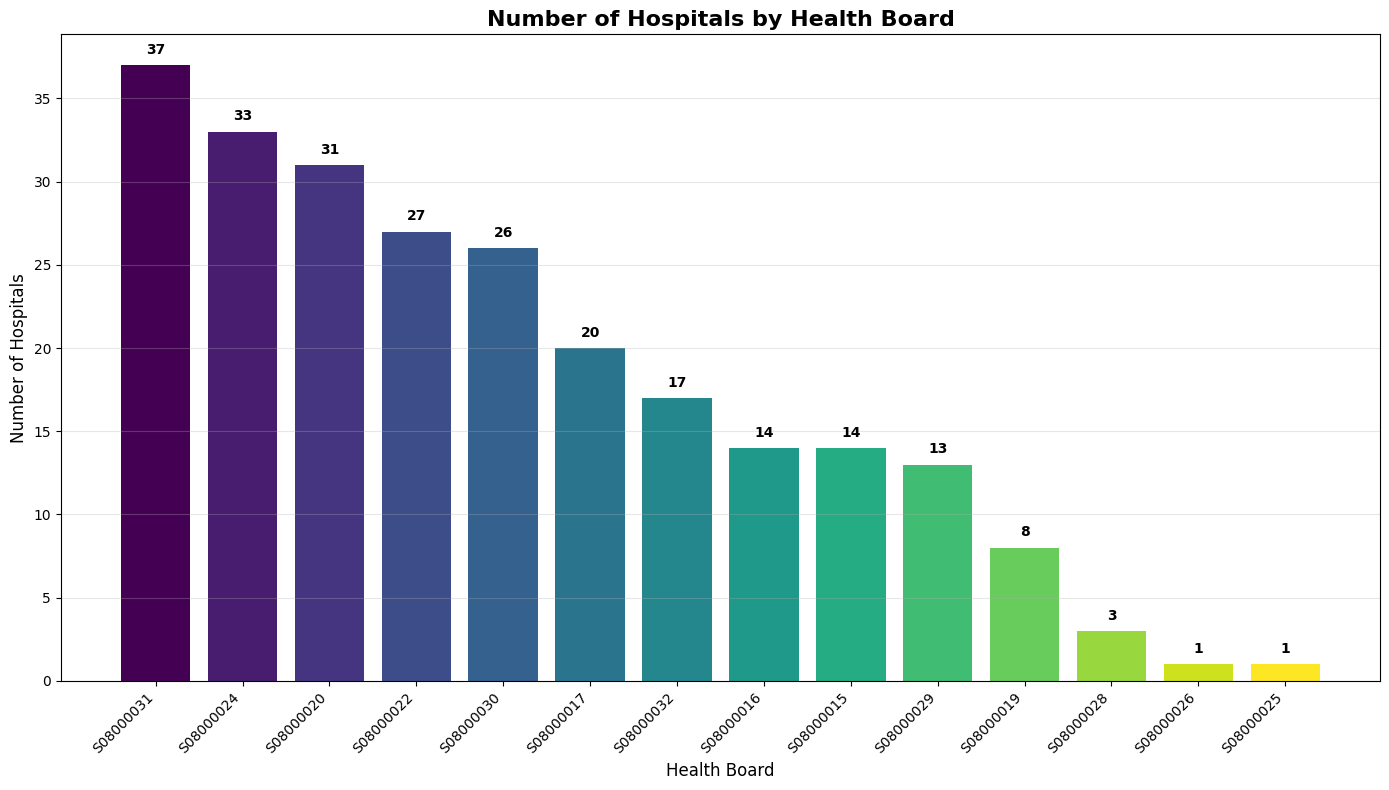

Hospital Distribution by Health Board:
  S08000031: 37 hospitals (15.1%)
  S08000024: 33 hospitals (13.5%)
  S08000020: 31 hospitals (12.7%)
  S08000022: 27 hospitals (11.0%)
  S08000030: 26 hospitals (10.6%)
  S08000017: 20 hospitals (8.2%)
  S08000032: 17 hospitals (6.9%)
  S08000016: 14 hospitals (5.7%)
  S08000015: 14 hospitals (5.7%)
  S08000029: 13 hospitals (5.3%)
  S08000019: 8 hospitals (3.3%)
  S08000028: 3 hospitals (1.2%)
  S08000026: 1 hospitals (0.4%)
  S08000025: 1 hospitals (0.4%)
Total hospitals: 245


In [4]:
# Geographic Distribution of Hospitals by Health Board
health_board_counts = hospitals_df['HealthBoard'].value_counts()

plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(health_board_counts)), health_board_counts.values, 
               color=plt.cm.viridis(np.linspace(0, 1, len(health_board_counts))))

plt.title('Number of Hospitals by Health Board', fontsize=16, fontweight='bold')
plt.xlabel('Health Board', fontsize=12)
plt.ylabel('Number of Hospitals', fontsize=12)
plt.xticks(range(len(health_board_counts)), health_board_counts.index, rotation=45, ha='right')

# Add value labels on bars
for i, (board, count) in enumerate(health_board_counts.items()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Hospital Distribution by Health Board:")
for board, count in health_board_counts.items():
    percentage = (count / len(hospitals_df)) * 100
    print(f"  {board}: {count} hospitals ({percentage:.1f}%)")
print(f"Total hospitals: {len(hospitals_df)}")

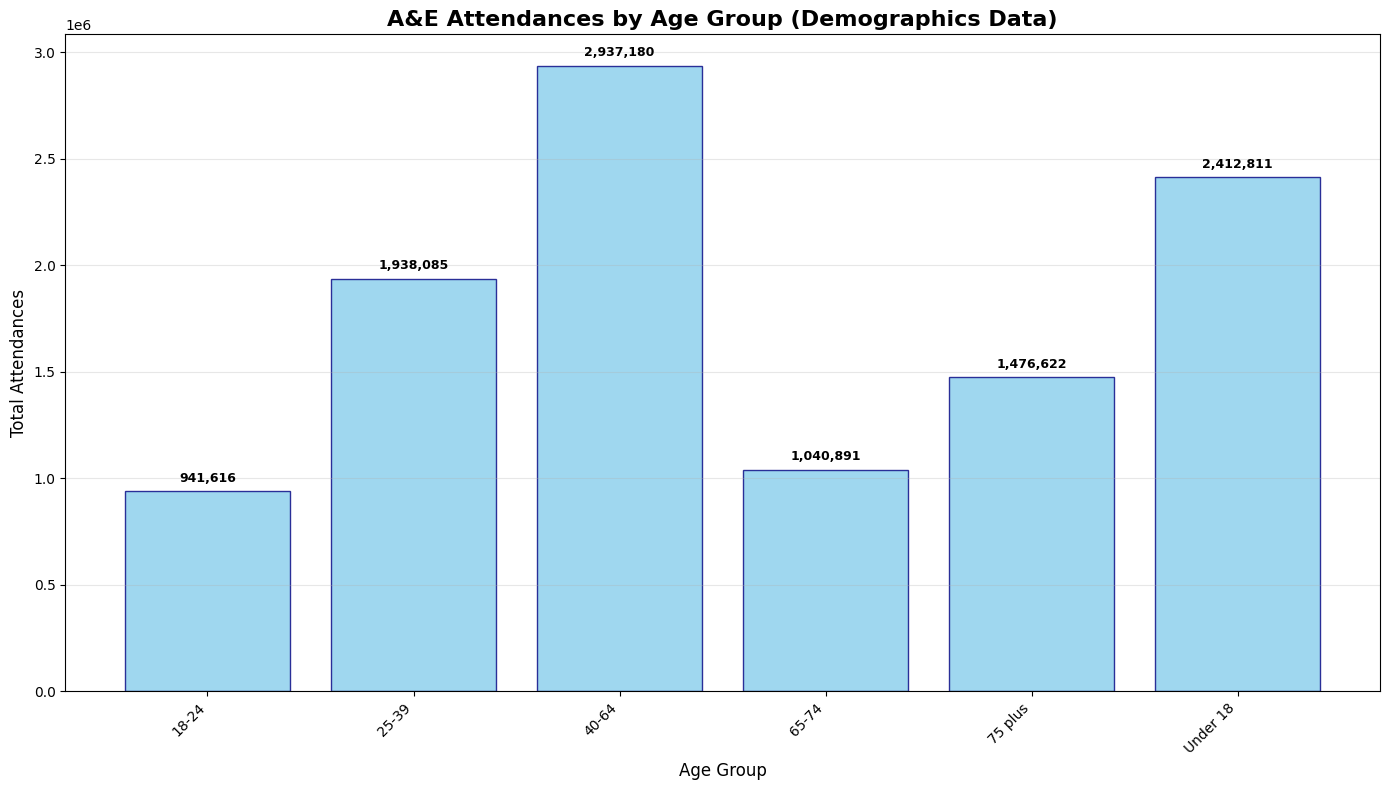

Age Distribution Summary:
  Total attendances: 10,747,205
  Age groups covered: 6
  Peak age group: 40-64 (2,937,180 attendances)
  Lowest age group: 18-24 (941,616 attendances)


In [5]:
# Age Distribution Analysis from Demographics Data
age_distribution = demographics_df.groupby('Age')['NumberOfAttendances'].sum().sort_index()

plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(age_distribution)), age_distribution.values, 
               color='skyblue', alpha=0.8, edgecolor='navy')

plt.title('A&E Attendances by Age Group (Demographics Data)', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Attendances', fontsize=12)
plt.xticks(range(len(age_distribution)), age_distribution.index, rotation=45, ha='right')

# Add value labels on bars
for i, (age, attendances) in enumerate(age_distribution.items()):
    if attendances > age_distribution.max() * 0.05:  # Only label significant bars
        plt.text(i, attendances + age_distribution.max() * 0.01, f'{attendances:,.0f}', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Age Distribution Summary:")
print(f"  Total attendances: {age_distribution.sum():,}")
print(f"  Age groups covered: {len(age_distribution)}")
print(f"  Peak age group: {age_distribution.idxmax()} ({age_distribution.max():,} attendances)")
print(f"  Lowest age group: {age_distribution.idxmin()} ({age_distribution.min():,} attendances)")

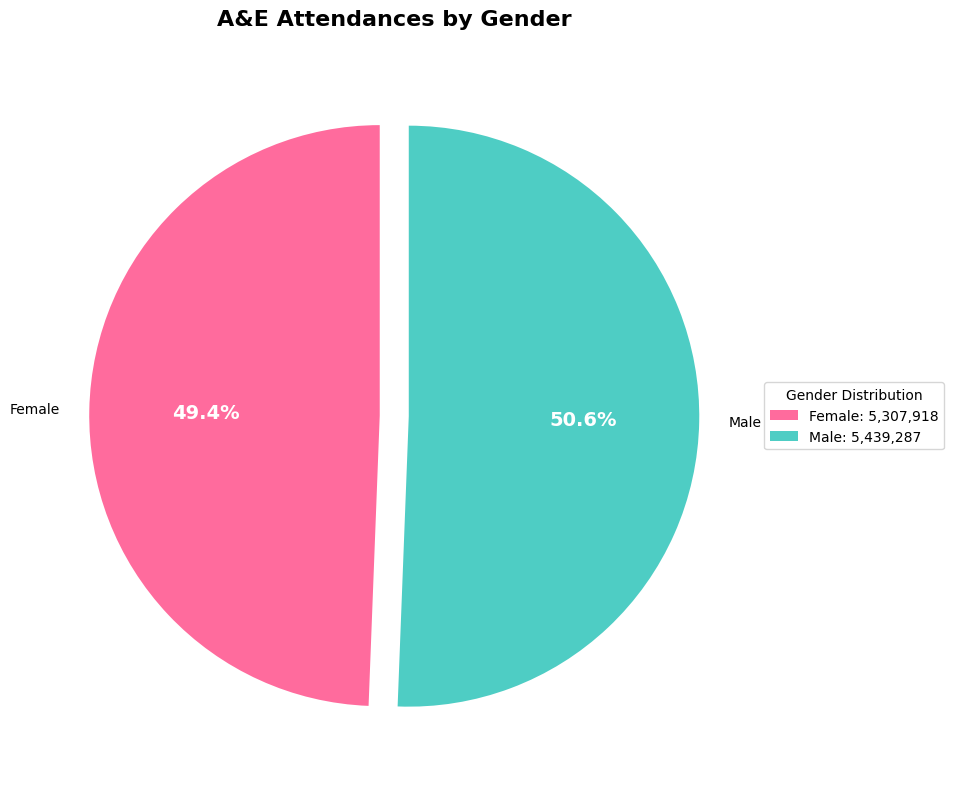

Gender Distribution:
  Female: 5,307,918 attendances (49.4%)
  Male: 5,439,287 attendances (50.6%)
Total: 10,747,205 attendances


In [6]:
# Gender Distribution in A&E Attendances
gender_data = demographics_df.groupby('Sex')['NumberOfAttendances'].sum()

plt.figure(figsize=(10, 8))
colors = ['#FF6B9D', '#4ECDC4']
wedges, texts, autotexts = plt.pie(gender_data.values, labels=gender_data.index, 
                                  autopct='%1.1f%%', startangle=90, colors=colors,
                                  explode=[0.05, 0.05])

# Enhance the pie chart
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(14)

plt.title('A&E Attendances by Gender', fontsize=16, fontweight='bold', pad=20)

# Add a legend with counts
legend_labels = [f'{gender}: {count:,}' for gender, count in gender_data.items()]
plt.legend(wedges, legend_labels, title="Gender Distribution", 
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

print(f"Gender Distribution:")
total_attendances = gender_data.sum()
for gender, count in gender_data.items():
    percentage = (count / total_attendances) * 100
    print(f"  {gender}: {count:,} attendances ({percentage:.1f}%)")
print(f"Total: {total_attendances:,} attendances")

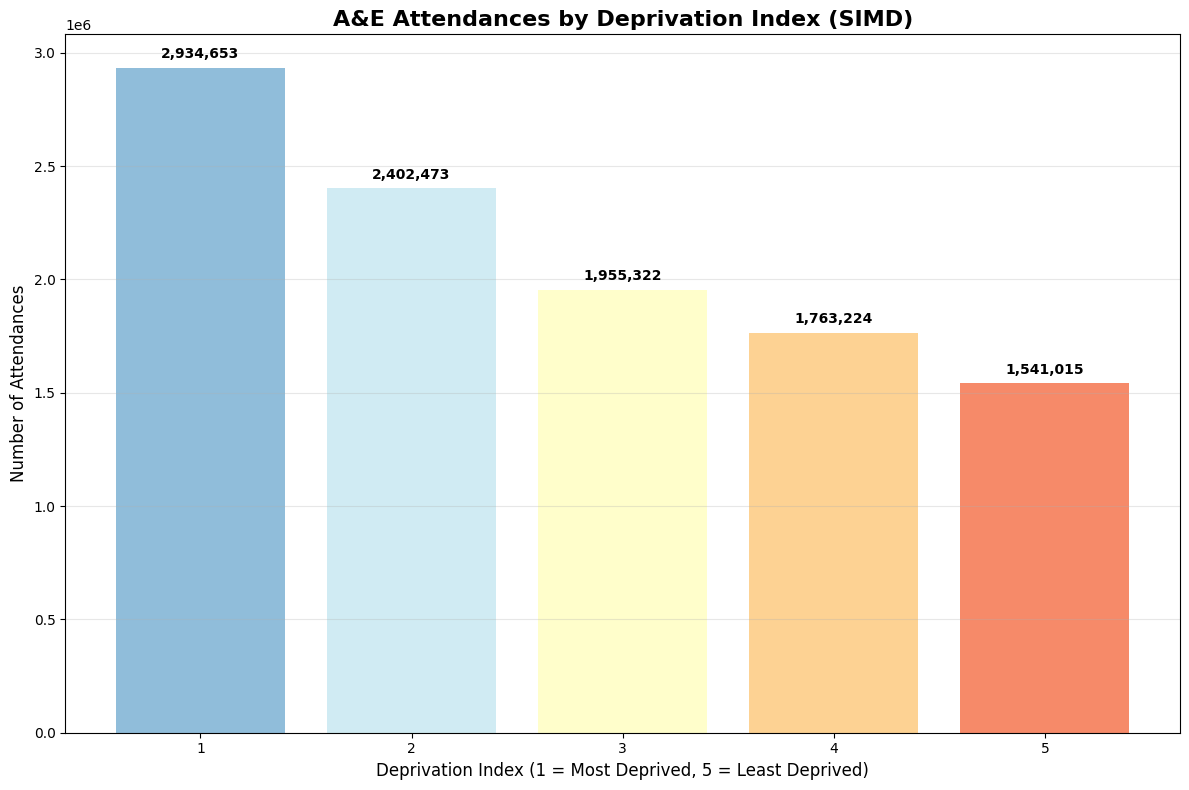

Deprivation Index Analysis:
  Index 1.0 (Most Deprived): 2,934,653 attendances (27.7%)
  Index 2.0 (Deprivation 2.0): 2,402,473 attendances (22.7%)
  Index 3.0 (Deprivation 3.0): 1,955,322 attendances (18.5%)
  Index 4.0 (Deprivation 4.0): 1,763,224 attendances (16.6%)
  Index 5.0 (Least Deprived): 1,541,015 attendances (14.5%)
  Ratio (Most/Least Deprived): 1.90:1


In [7]:
# Deprivation Index Analysis
deprivation_data = demographics_df.groupby('Deprivation')['NumberOfAttendances'].sum().sort_index()

plt.figure(figsize=(12, 8))
colors = plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(deprivation_data)))
bars = plt.bar(deprivation_data.index, deprivation_data.values, color=colors, alpha=0.8)

plt.title('A&E Attendances by Deprivation Index (SIMD)', fontsize=16, fontweight='bold')
plt.xlabel('Deprivation Index (1 = Most Deprived, 5 = Least Deprived)', fontsize=12)
plt.ylabel('Number of Attendances', fontsize=12)

# Add value labels on bars
for i, (dep_idx, attendances) in enumerate(zip(deprivation_data.index, deprivation_data.values)):
    plt.text(dep_idx, attendances + deprivation_data.max() * 0.01, f'{attendances:,}', 
             ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.xticks(deprivation_data.index)
plt.tight_layout()
plt.show()

print(f"Deprivation Index Analysis:")
total = deprivation_data.sum()
for dep_idx, count in deprivation_data.items():
    percentage = (count / total) * 100
    deprivation_level = "Most Deprived" if dep_idx == 1 else "Least Deprived" if dep_idx == 5 else f"Deprivation {dep_idx}"
    print(f"  Index {dep_idx} ({deprivation_level}): {count:,} attendances ({percentage:.1f}%)")

# Calculate ratio between most and least deprived
ratio = deprivation_data.iloc[0] / deprivation_data.iloc[-1]
print(f"  Ratio (Most/Least Deprived): {ratio:.2f}:1")

In [3]:
# Detailed Dataset Inspection
print("="*80)
print("COMPREHENSIVE DATASET INSPECTION")
print("="*80)

print("\n📋 HOSPITALS DATASET:")
print(f"  Shape: {hospitals_df.shape}")
print(f"  Columns: {list(hospitals_df.columns)}")
print(f"  Sample data:")
print(hospitals_df.head(3))
print(f"  Data types:")
print(hospitals_df.dtypes)

print("\n📋 DEMOGRAPHICS DATASET:")
print(f"  Shape: {demographics_df.shape}")
print(f"  Columns: {list(demographics_df.columns)}")
print(f"  Sample data:")
print(demographics_df.head(3))
print(f"  Data types:")
print(demographics_df.dtypes)

print("\n📋 ACTIVITY DATASET:")
print(f"  Shape: {activity_df.shape}")
print(f"  Columns: {list(activity_df.columns)}")
print(f"  Sample data:")
print(activity_df.head(3))
print(f"  Data types:")
print(activity_df.dtypes)

print("="*80)

COMPREHENSIVE DATASET INSPECTION

📋 HOSPITALS DATASET:
  Shape: (245, 15)
  Columns: ['HospitalCode', 'HospitalName', 'AddressLine1', 'AddressLine2', 'AddressLine2QF', 'AddressLine3', 'AddressLine3QF', 'AddressLine4', 'AddressLine4QF', 'Postcode', 'HealthBoard', 'HSCP', 'CouncilArea', 'IntermediateZone', 'DataZone']
  Sample data:
  HospitalCode                 HospitalName     AddressLine1   AddressLine2  \
0        A101H  Arran War Memorial Hospital          Lamlash  Isle of Arran   
1        A103H    Ayrshire Central Hospital  Kilwinning Road         Irvine   
2        A110H       Lady Margaret Hospital       College St       Millport   

  AddressLine2QF     AddressLine3 AddressLine3QF AddressLine4 AddressLine4QF  \
0            NaN              NaN              z          NaN              z   
1            NaN              NaN              z          NaN              z   
2            NaN  Isle of Cumbrae            NaN          NaN              z   

  Postcode HealthBoard       

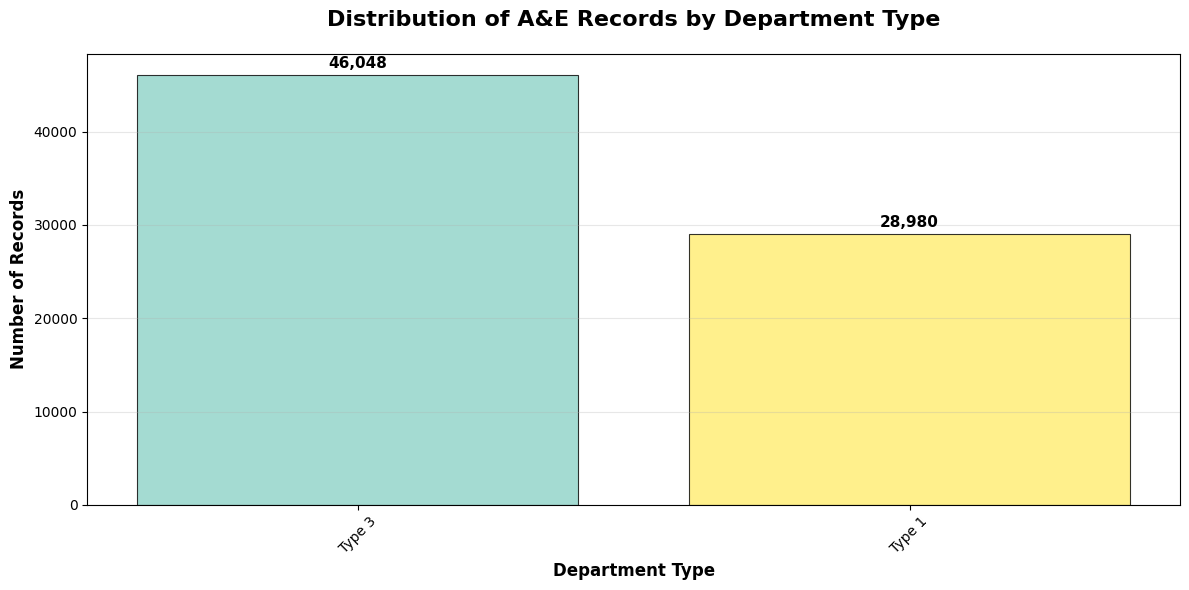

Department Type Distribution:
  Type 3: 46,048 records (61.4%)
  Type 1: 28,980 records (38.6%)
Total records: 75,028


In [8]:
# Department Type Distribution from Activity Data
plt.figure(figsize=(12, 6))
dept_counts = activity_df['DepartmentType'].value_counts()

# Create bar plot with different colors
colors = plt.cm.Set3(np.linspace(0, 1, len(dept_counts)))
bars = plt.bar(dept_counts.index, dept_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=0.8)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.title('Distribution of A&E Records by Department Type', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Department Type', fontsize=12, fontweight='bold')
plt.ylabel('Number of Records', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary
print("Department Type Distribution:")
total_records = dept_counts.sum()
for dept, count in dept_counts.items():
    percentage = (count / total_records) * 100
    print(f"  {dept}: {count:,} records ({percentage:.1f}%)")
print(f"Total records: {total_records:,}")

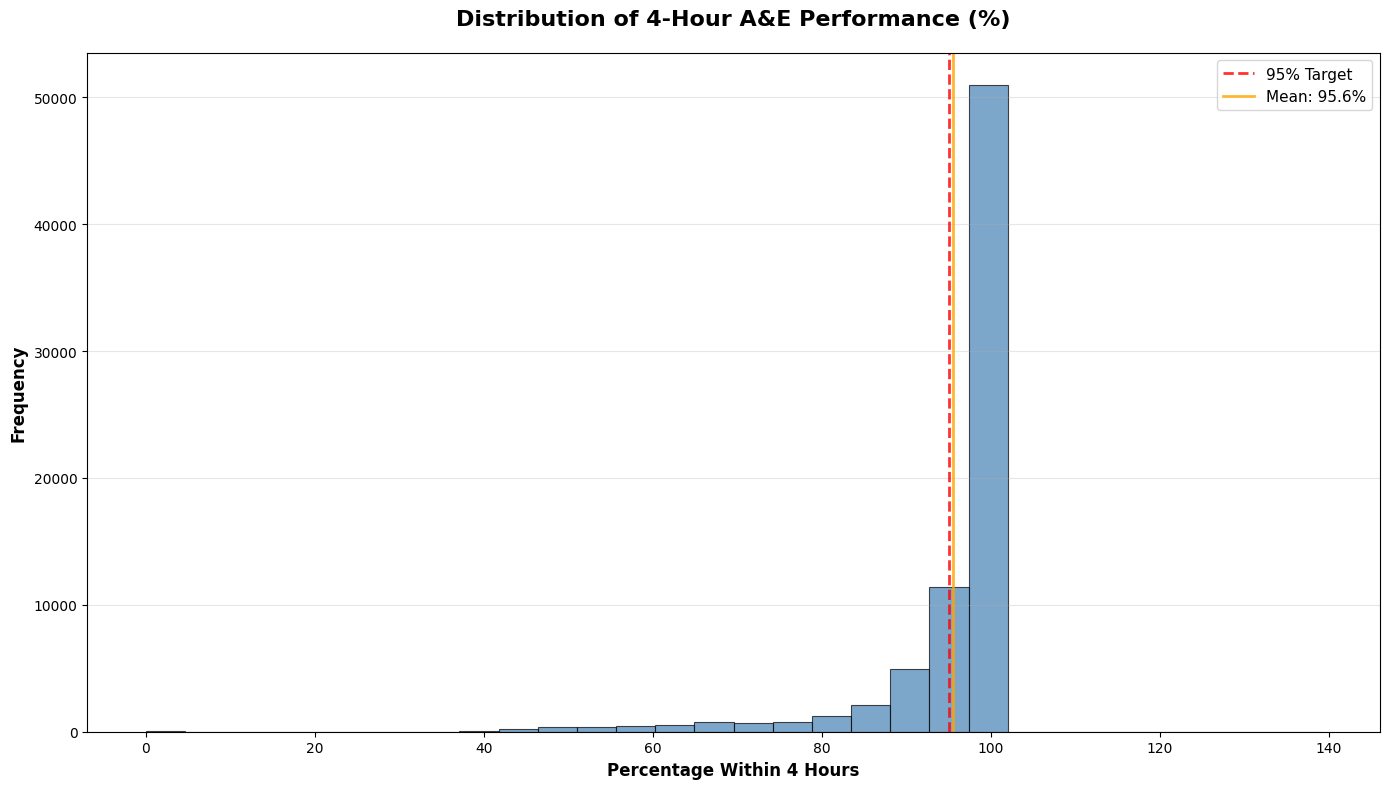

4-Hour Performance Statistics:
  Mean: 95.57%
  Median: 99.50%
  Min: 0.00%
  Max: 139.10%
  Records above 95% target: 58,419 (77.9%)


In [9]:
# 4-Hour Performance Analysis
plt.figure(figsize=(14, 8))

# Filter out rows with missing percentage data
performance_data = activity_df[activity_df['PercentageWithin4HoursAll'].notna()]

# Create histogram of 4-hour performance percentages
n_bins = 30
plt.hist(performance_data['PercentageWithin4HoursAll'], bins=n_bins, alpha=0.7, 
         color='steelblue', edgecolor='black', linewidth=0.8)

plt.axvline(x=95, color='red', linestyle='--', linewidth=2, label='95% Target', alpha=0.8)
plt.axvline(x=performance_data['PercentageWithin4HoursAll'].mean(), color='orange', 
           linestyle='-', linewidth=2, label=f'Mean: {performance_data["PercentageWithin4HoursAll"].mean():.1f}%', alpha=0.8)

plt.title('Distribution of 4-Hour A&E Performance (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Percentage Within 4 Hours', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Performance statistics
print("4-Hour Performance Statistics:")
print(f"  Mean: {performance_data['PercentageWithin4HoursAll'].mean():.2f}%")
print(f"  Median: {performance_data['PercentageWithin4HoursAll'].median():.2f}%")
print(f"  Min: {performance_data['PercentageWithin4HoursAll'].min():.2f}%")
print(f"  Max: {performance_data['PercentageWithin4HoursAll'].max():.2f}%")
print(f"  Records above 95% target: {len(performance_data[performance_data['PercentageWithin4HoursAll'] >= 95]):,} ({(len(performance_data[performance_data['PercentageWithin4HoursAll'] >= 95])/len(performance_data)*100):.1f}%)")

In [ ]:
# Monthly Activity Trends
plt.figure(figsize=(14, 8))

# Group by month and sum attendances
monthly_activity = activity_df.groupby('Month')['NumberOfAttendancesAll'].sum().reset_index()

# Convert month to more readable format
monthly_activity['Year'] = monthly_activity['Month'] // 100
monthly_activity['MonthNum'] = monthly_activity['Month'] % 100
monthly_activity['Date'] = pd.to_datetime(monthly_activity[['Year', 'MonthNum']].assign(day=1))

# Sort by date
monthly_activity = monthly_activity.sort_values('Date')

# Create line plot
plt.plot(monthly_activity['Date'], monthly_activity['NumberOfAttendancesAll'], 
         marker='o', linewidth=2, markersize=4, color='darkgreen', alpha=0.8)

plt.title('Monthly A&E Attendance Trends', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Total Attendances', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Format y-axis to show values in thousands
from matplotlib.ticker import FuncFormatter
def thousands_formatter(x, pos):
    return f'{x/1000:.0f}K'
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Monthly Trends Summary:")
print(f"  Date range: {monthly_activity['Date'].min().strftime('%Y-%m')} to {monthly_activity['Date'].max().strftime('%Y-%m')}")
print(f"  Average monthly attendances: {monthly_activity['NumberOfAttendancesAll'].mean():,.0f}")
print(f"  Peak month: {monthly_activity.loc[monthly_activity['NumberOfAttendancesAll'].idxmax(), 'Date'].strftime('%Y-%m')} ({monthly_activity['NumberOfAttendancesAll'].max():,} attendances)")
print(f"  Lowest month: {monthly_activity.loc[monthly_activity['NumberOfAttendancesAll'].idxmin(), 'Date'].strftime('%Y-%m')} ({monthly_activity['NumberOfAttendancesAll'].min():,} attendances)")

In [ ]:
# Attendance Category Distribution
plt.figure(figsize=(10, 10))

category_counts = activity_df['AttendanceCategory'].value_counts()

# Create pie chart with custom colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']
wedges, texts, autotexts = plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
                                  colors=colors, startangle=90, explode=[0.05]*len(category_counts))

# Enhance the appearance
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')

plt.title('Distribution of A&E Attendance Categories', fontsize=16, fontweight='bold', pad=20)

# Add legend with counts
legend_labels = [f'{cat}: {count:,}' for cat, count in category_counts.items()]
plt.legend(legend_labels, title="Category Counts", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()

print("Attendance Category Summary:")
total = category_counts.sum()
for category, count in category_counts.items():
    percentage = (count / total) * 100
    print(f"  {category}: {count:,} records ({percentage:.1f}%)")
print(f"Total records: {total:,}")